In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv("../data/CreditScoring.csv")

In [23]:
def data_prep_function(data):
    df = data.copy()
    df.columns = df.columns.map(lambda x: x.lower())
    
    status_map = {
    1: "ok",
    2: "default",
    0: "unknown"
    }
    df['status'] = df['status'].map(status_map)
    home_ownership_map = {
        1: "rent",
        2: "owner",
        3: "priv",
        4: "ignore",
        5: "parents",
        6: "other",
        0: "unknown"
    }
    df['home'] = df['home'].map(home_ownership_map)
    marital_status_map = {
        1: "single",
        2: "married",
        3: "widowed",
        4: "separated",
        5: "divorced",
        0: "unknown",
    }
    df['marital'] = df['marital'].map(marital_status_map)
    records_map = {
        1 : "no_records",
        2 : "yes_records"
    }
    df['records'] = df['records'].map(records_map)
    job_status_map = {
        1: "fixed",
        2: "part-time",
        3: "freelance",
        4: "others",
        0: "unknown"
    }
    df['job'] = df['job'].map(job_status_map)
    
    df['income'] = df['income'].replace(to_replace=99999999, value = np.nan)
    df['assets'] = df['assets'].replace(to_replace=99999999, value = np.nan)
    df['debt'] = df['debt'].replace(to_replace=99999999, value = np.nan)
    
    df = df[df['status'] != 'unknown'].reset_index(drop=True)
    
    y = (df['status'] == 'default').astype(int)
    X = df.drop(columns=['status'])
    
    return X, y

In [24]:
X, y = data_prep_function(data)

In [25]:
X

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,9,rent,60,30,married,no_records,freelance,73,129.0,0.0,0.0,800,846
1,17,rent,60,58,widowed,no_records,fixed,48,131.0,0.0,0.0,1000,1658
2,10,owner,36,46,married,yes_records,freelance,90,200.0,3000.0,0.0,2000,2985
3,0,rent,60,24,single,no_records,fixed,63,182.0,2500.0,0.0,900,1325
4,0,rent,36,26,single,no_records,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,1,rent,60,39,married,no_records,fixed,69,92.0,0.0,0.0,900,1020
4450,22,owner,60,46,married,no_records,fixed,60,75.0,3000.0,600.0,950,1263
4451,0,owner,24,37,married,no_records,part-time,60,90.0,3500.0,0.0,500,963
4452,0,rent,48,23,single,no_records,freelance,49,140.0,0.0,0.0,550,550


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
X_train_dict = X_train.to_dict(orient='records')
X_train_final = dv.fit_transform(X_train_dict)


In [29]:
X_train_final

array([[3.80e+01, 8.50e+02, 3.50e+03, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.80e+01, 8.50e+02, 5.00e+03, ..., 1.00e+00, 1.40e+01, 4.80e+01],
       [4.60e+01, 5.00e+02, 8.00e+03, ..., 0.00e+00, 1.20e+01, 3.60e+01],
       ...,
       [5.40e+01, 6.00e+02, 5.00e+03, ..., 0.00e+00, 2.00e+01, 6.00e+01],
       [3.80e+01, 3.00e+03, 1.25e+04, ..., 1.00e+00, 3.00e+00, 3.60e+01],
       [5.10e+01, 3.50e+02, 2.00e+03, ..., 0.00e+00, 1.20e+01, 1.20e+01]],
      shape=(3117, 27))

<Axes: xlabel='assets', ylabel='Count'>

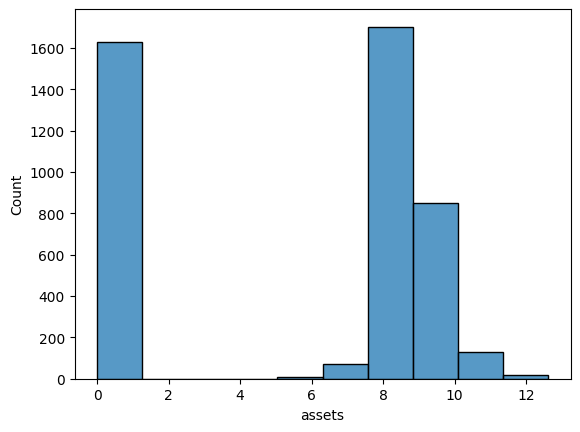

In [33]:
sns.histplot(np.log1p(X['assets']), bins=10)